## Convolution Neural Network (Image Classification)

### Goal:
The goal in this module will be to use the images in the CIFAR-10 dataset and use Convolutional Neural Network to try to classify each image. 

In [1]:
# import needed libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will be using [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that contains colored images in 10 classes, with 6000 images per class.

In [2]:
# load the CIFAR-10 Dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# check the shape of our tesing sets
test_images.shape, test_images.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

we have 10000 images in our test_images data set and each image is 32 by 32 pixels with 3 rgb colors. 

In [4]:
# check the shape of our training sets
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

we have 50000 images in our train_images data set and each image is 32 by 32 pixels with 3 rgb colors. 

In [5]:
# observe the first 5 training labels
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# train_images is a 2d-array and we will convert to a 1d-array
train_labels = train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
# we do the same for the testing labels
test_labels = test_labels.reshape(-1,)

In [8]:
# Create a list of the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [9]:
# Now we plot images
def plot_sample(X,y,index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

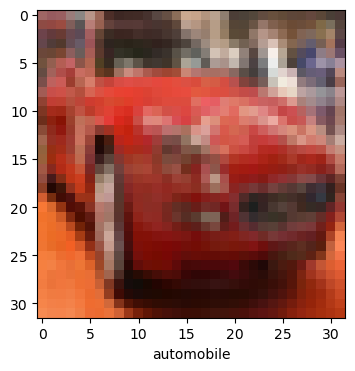

In [10]:
# plot the image with index 5
plot_sample(train_images, train_labels, 5)

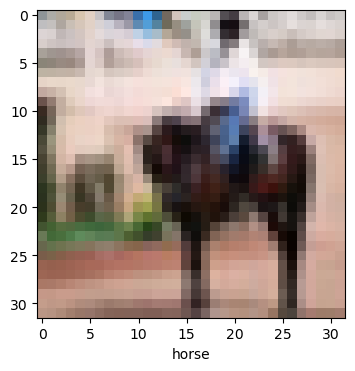

In [11]:
# plot the image with index 11
plot_sample(train_images,train_labels, 11)

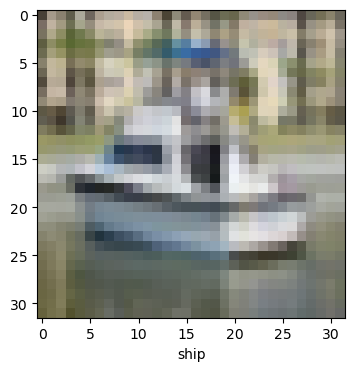

In [12]:
# plot the image with index 501
plot_sample(train_images,train_labels, 501)

In [13]:
# now we normalize the image to be between 0 to 1
train_images.max(), test_images.max()

(255, 255)

In [14]:
# make sure its float
train_images = train_images/255.0
test_images = test_images/255.0

In [15]:
# Sequential Neural Network 
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

# compile our neural network
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8119 - accuracy: 0.3546
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6221 - accuracy: 0.4275
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5416 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4820 - accuracy: 0.4780
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4314 - accuracy: 0.4964
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3877 - accuracy: 0.5107
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.3499 - accuracy: 0.5251
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3169 - accuracy: 0.5357
Epoch 9/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.2834 - accuracy: 0.5491
Epoch 10/10
1563/1563 [==============================] - 37s 23m

Observe that accuracy score of the Sequential Neural Network on the training data is 56% with 10 epochs.

In [16]:
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [17]:
# get label predictions on on test images
y_pred = ann.predict(test_images)

print(y_pred[0])

[0.0230643  0.03352096 0.11740083 0.46304703 0.05080029 0.21777181
 0.06374709 0.00093182 0.02741091 0.002305  ]


In [18]:
# use argmax function to get the index of the max number in each array
y_pred_classes = [np.argmax(element) for element in y_pred] 
print(y_pred_classes[:5])

[3, 1, 0, 0, 4]


In [19]:
# Classification Report
print("Classification Report: \n", classification_report(test_labels,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60      1000
           1       0.62      0.70      0.66      1000
           2       0.43      0.42      0.43      1000
           3       0.38      0.24      0.29      1000
           4       0.50      0.40      0.44      1000
           5       0.32      0.62      0.42      1000
           6       0.55      0.59      0.57      1000
           7       0.62      0.56      0.59      1000
           8       0.66      0.63      0.65      1000
           9       0.72      0.42      0.53      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.52     10000
weighted avg       0.54      0.52      0.52     10000



In [20]:
import seaborn as sns

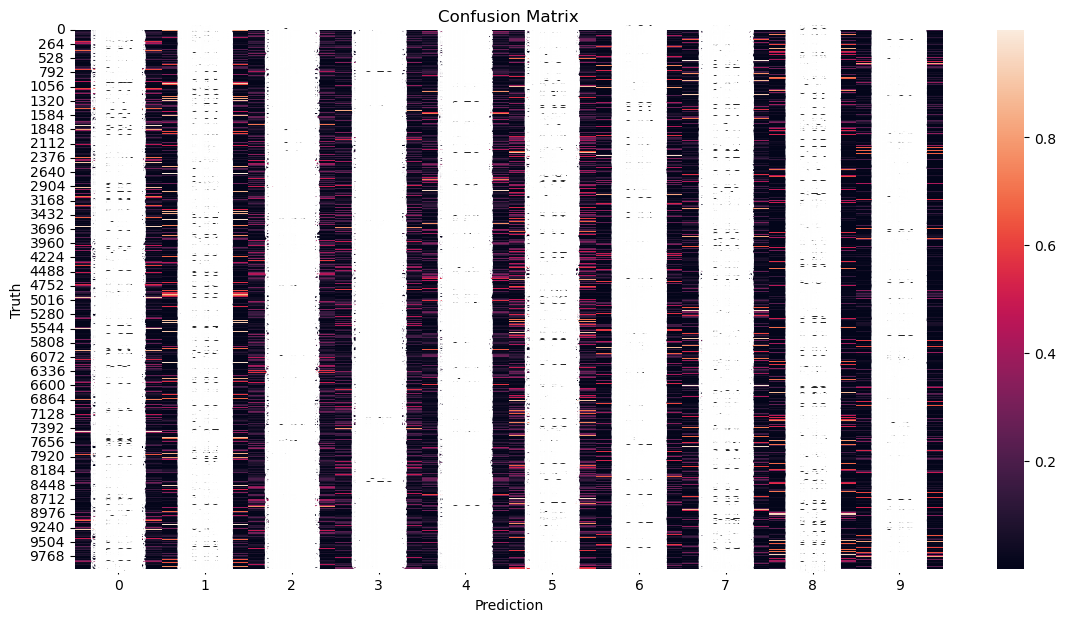

In [21]:
# plot the heatmap of the prediction array
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Convoulutional Neural Network
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') # returned probabilities for each class
]) 

In [23]:
# compile our CNN 
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
# fit our cnn on our training sets on 10 epochs
cnn.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5064 - accuracy: 0.4601
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1693 - accuracy: 0.5901
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0404 - accuracy: 0.6359
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9627 - accuracy: 0.6634
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9011 - accuracy: 0.6870
Epoch 6/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8435 - accuracy: 0.7066
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8021 - accuracy: 0.7207
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7634 - accuracy: 0.7346
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7263 - accuracy: 0.7480
Epoch 10/10
1563/1563 [==============================] - 25s 16m

Observe the Convolutional Neural Network got an accuracy score of 77% on the training data with 10 epochs, which is a greater accuracy score when we used the Sequential Neural Network with similar epochs. 

In [25]:
# get Loss and Accuracy on Testing sets
cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9424 - accuracy: 0.6809


[0.9424201250076294, 0.680899977684021]

Now the accuracy score of the Convolutional Neural Network on testing sets it returned an accuracy score of 70%. 

In [26]:
# Get label predictions for each class on test images
y_pred = cnn.predict(test_images)
print(y_pred[0])

[4.0146118e-04 1.6214566e-04 9.0255998e-03 7.8662503e-01 4.1184514e-03
 1.8199077e-01 1.8300719e-03 3.4593465e-04 1.5266835e-02 2.3365437e-04]


In [27]:
# argmax function to get index of the highest value in array
y_classes = [np.argmax(element) for element in y_pred]
# print predicted labels of the first 5 images
print(y_classes[:5])

[3, 8, 1, 0, 4]


In [28]:
# print the actual labels of the first 5 images
print(test_labels[:5])

[3 8 8 0 6]


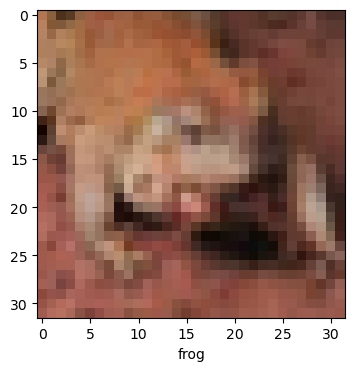

In [29]:
# plotting the image with index 5 on testing set
plot_sample(test_images, test_labels, 5)

In [30]:
# see if our predicts the image correctly
class_names[y_classes[5]]

'frog'

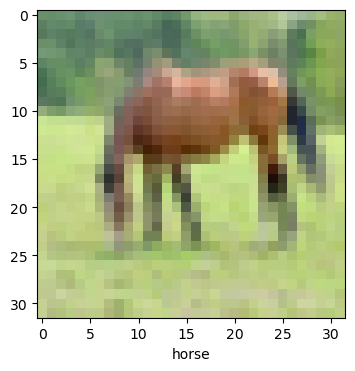

In [31]:
# plotting the image with index 60 on testing set
plot_sample(test_images, test_labels, 60)

In [32]:
# see if our predicts the image correctly
class_names[y_classes[60]]

'horse'

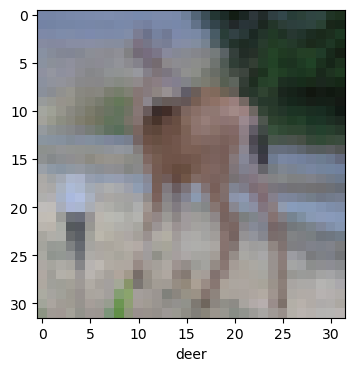

In [33]:
# plotting the image with index 100 on testing set
plot_sample(test_images,test_labels, 100)

In [34]:
# see if our predicts the image correctly
class_names[y_classes[100]]

'deer'

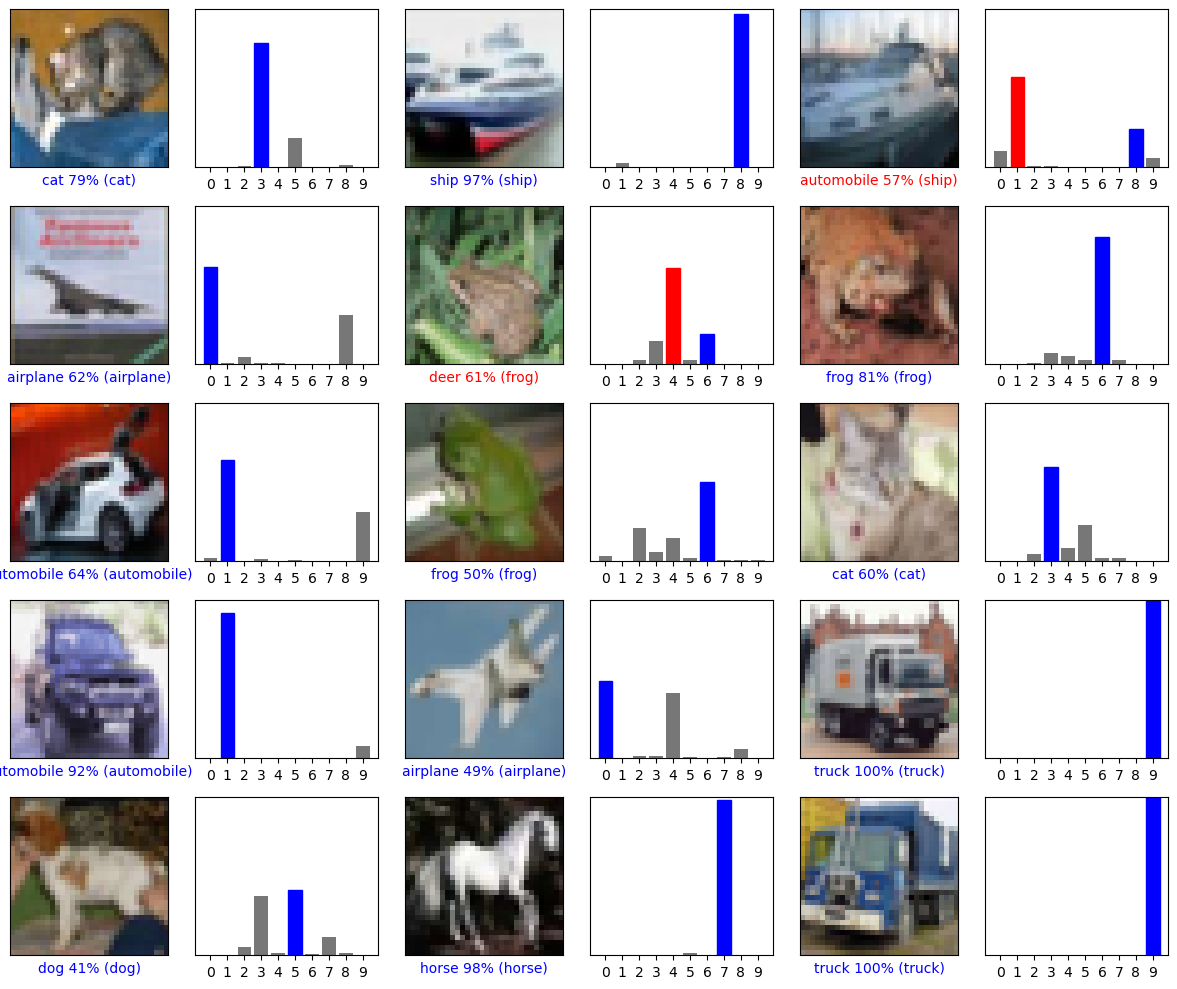

In [35]:
# Visualize predictions

# will plot 15 images along with their predicted labels.
predictions = cnn.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
    
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

From the 15 random images, our Convolutional Neural Network Model misclassified 2 images. 